In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571

import glob
import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

#### Keep variants greater than mean heteroplasmy minimum parameter 'het'

In [5]:
het = 0.01

In [6]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
cellr="True"
in_prefix = f'2020_11_18'
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,mapq,f"cellr_{cellr}")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,mapq,f"cellr_{cellr}")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")
coverage_pbmc_j_dir = join(indir, in_prefix, pbmc_j, mapq, f"{pbmc_j}_scPileup_{num_reads}")
coverage_pbmc_p_dir = join(indir, in_prefix, pbmc_p, mapq, f"{pbmc_p}_scPileup_{num_reads}")

concat_pbmc_j_dir = join(pbmc_j_indir,f"{pbmc_j}_{num_reads}")
concat_pbmc_p_dir = join(pbmc_p_indir,f"{pbmc_p}_{num_reads}")

mgatk_variants_pbmc_j = join(pbmc_j_indir,f'{pbmc_j}_{num_reads}',f'{pbmc_j}.af.tsv')
mgatk_variants_pbmc_p = join(pbmc_p_indir,f'{pbmc_p}_{num_reads}',f'{pbmc_p}.af.tsv')

In [7]:
pbmc_p_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_p, sep='\t')
print("Number of variants from mgatk", pbmc_p_AF_by_cell.shape[0])

#pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[~(pbmc_p_AF_by_cell<het).all(axis=1)]
pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[(pbmc_p_AF_by_cell.mean(axis=1)>=het)]
print(f"Number of variants after mean heteroplasmy of {het}: {pbmc_p_AF_by_cell.shape[0]}")
pbmc_p_AF_by_cell

Number of variants from mgatk 36788
Number of variants after mean heteroplasmy of 0.01: 47


,AAACGAAAGCTCGTTA-1,AAACGAAGTCCAGACC-1,AAACTGCCACTCCACT-1,AAAGGATAGGGAGTTC-1,AAATGCCCACTTATGG-1,AACAGTCCAGTCCTGG-1,AACAGTCTCATTCGGA-1,AACATCGGTCATTGGT-1,AACCAACTCGGGTCCA-1,AACCTTTGTGCTTACA-1,...,TTCTGTAAGGCACCTC-1,TTGAGTGTCGCTACCT-1,TTGCACCGTCAGGCTC-1,TTGCCCAGTAAAGGCC-1,TTGCCCATCGTTCAGA-1,TTGCTTATCCTAAGTG-1,TTTACGTCAGGATGTG-1,TTTACGTCAGTTCGGC-1,TTTGCGCCAACTCGAT-1,TTTGGTTAGTAGGAAG-1
3106C>A,0.857143,0.444444,0.000000,0.000000,0.200000,0.416667,0.473684,0.696970,0.666667,0.0,...,0.785714,0.000000,0.347826,0.000000,0.444444,0.642857,0.901961,0.000000,0.653846,0.246377
3599T>A,0.000000,0.076642,0.000000,0.000000,0.097510,0.000000,0.000000,0.074305,0.088123,0.0,...,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000
3882G>A,1.000000,1.000000,1.000000,0.994220,0.997323,0.994845,0.998697,0.997582,0.997283,1.0,...,0.996276,0.997120,1.000000,1.000000,0.998785,1.000000,0.998951,1.000000,1.000000,0.998008
11719G>A,0.996255,0.997230,1.000000,1.000000,0.996788,1.000000,0.998205,0.996439,0.994595,1.0,...,0.998701,0.999262,0.996032,1.000000,0.998758,0.997664,0.999048,0.989362,0.997650,0.997856
11838T>A,0.013683,0.000000,0.000000,0.041995,0.013757,0.036298,0.014358,0.034722,0.018147,0.0,...,0.015890,0.023228,0.029787,0.000000,0.015504,0.000000,0.018730,0.000000,0.029229,0.013807
15043G>A,1.000000,0.995960,1.000000,1.000000,0.998459,1.000000,0.997677,1.000000,0.995677,1.0,...,0.991150,0.997849,0.998145,1.000000,1.000000,1.000000,0.998403,0.996109,0.998387,0.998802
15301G>A,1.000000,1.000000,1.000000,1.000000,0.995751,0.997006,0.998527,0.998335,0.998929,1.0,...,0.997279,0.998955,0.989967,1.000000,0.994553,0.992248,1.000000,0.988000,0.992879,0.996117
146T>C,1.000000,0.984375,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,0.993921,1.000000,0.990758,0.997290,0.000000,0.994505,1.000000,1.000000
199T>C,0.997245,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997802,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.994318,1.000000,1.000000
310T>C,0.257069,0.184810,0.000000,0.228000,0.230392,0.182292,0.395785,0.223661,0.298938,0.0,...,0.287016,0.238000,0.236659,0.000000,0.201709,0.366337,0.000000,0.186047,0.166181,0.212081


cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

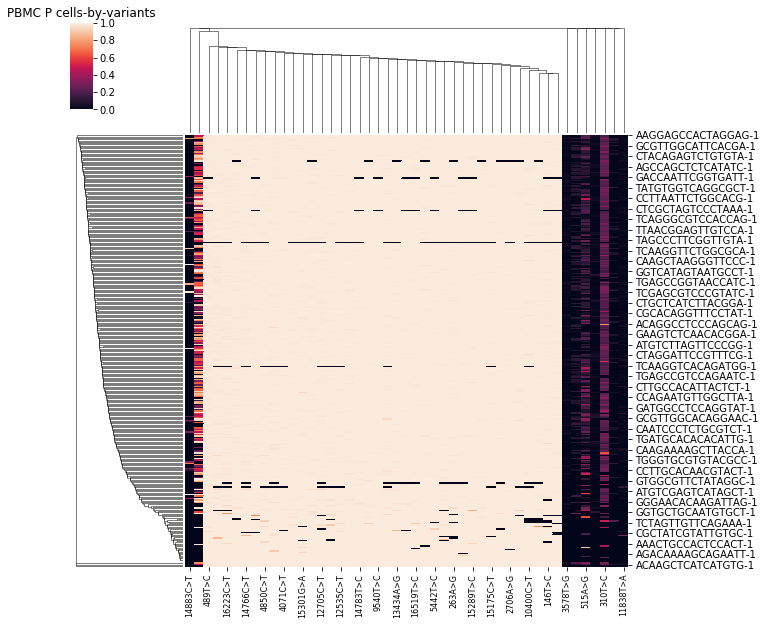

In [8]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True, vmin=0, vmax=1,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

### D. AF Binarized and inclusion of high occuring variants

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

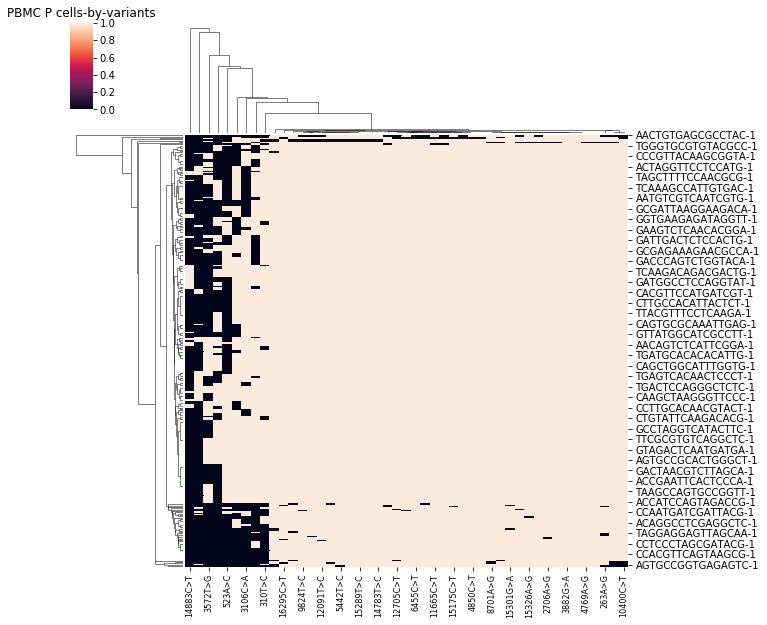

In [9]:
%matplotlib inline
bin_pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.copy()
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell>0] = 1
cluster_help.plot_cluster(df=bin_pbmc_p_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

## PBMC J

In [10]:
pbmc_j_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_j, sep='\t')
print("Number of variants from mgatk", pbmc_j_AF_by_cell.shape[0])
pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[(pbmc_j_AF_by_cell.mean(axis=1)>=het)]
print(f"Number of variants after mean heteroplasmy of {het}: {pbmc_j_AF_by_cell.shape[0]}")
pbmc_j_AF_by_cell

Number of variants from mgatk 35540
Number of variants after mean heteroplasmy of 0.01: 48


,AAACGAAGTGTCCCAG-1,AAACTGCGTAGCGTTT-1,AAAGATGAGTCCGGAA-1,AAAGATGCAGGGCTTC-1,AAAGATGCATGTGGGA-1,AAAGGATAGCAGGAGG-1,AAAGGATGTGAATACA-1,AAAGGATGTGCTTTGA-1,AAAGGATTCACCGCGA-1,AAAGGGCCATTGAACC-1,...,TTGTTCACATTATGGC-1,TTGTTGTCATAGCCGC-1,TTGTTGTGTGAGTTGG-1,TTGTTGTTCTTGCGCT-1,TTTACGTGTCACAGGA-1,TTTACGTGTCCGCTTT-1,TTTGAGGGTTTGTAGC-1,TTTGCGCCAACTCGAT-1,TTTGGCCCACCGAAAG-1,TTTGTGTGTGCGTCCA-1
3106C>A,0.476190,0.857143,0.727273,0.000000,0.000000,0.738095,0.448276,0.000000,0.000000,0.890909,...,0.000000,0.666667,0.822222,1.000000,0.093750,0.620000,0.794118,0,0.617021,0.500000
3882G>A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
8865G>A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.952261
11719G>A,0.993234,1.000000,1.000000,0.996845,1.000000,1.000000,1.000000,0.995935,0.997680,0.960648,...,0.994302,1.000000,0.966361,0.995652,1.000000,1.000000,0.992386,1,0.987342,0.998043
15043G>A,0.998660,1.000000,1.000000,1.000000,1.000000,1.000000,0.997361,0.995876,0.994403,0.997996,...,0.997024,1.000000,1.000000,1.000000,1.000000,1.000000,0.994898,0,1.000000,1.000000
15301G>A,0.994258,0.998124,0.997403,0.994444,1.000000,1.000000,0.997175,1.000000,0.997872,0.997222,...,1.000000,0.994898,0.997033,1.000000,1.000000,0.998319,1.000000,0,1.000000,1.000000
146T>C,1.000000,1.000000,0.995614,1.000000,1.000000,1.000000,0.997579,1.000000,0.990164,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1.000000,0.997596
199T>C,0.996564,0.988372,1.000000,1.000000,1.000000,1.000000,0.996700,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.992095,1.000000,0,1.000000,1.000000
310T>C,0.866667,0.721154,0.981132,0.680851,0.000000,0.765432,0.836134,0.760479,0.858131,0.890855,...,0.923913,0.886364,0.767677,0.796460,0.650602,0.850144,0.894410,0,0.961240,0.896364
489T>C,0.993837,0.998043,0.996441,0.996960,1.000000,0.991935,0.995031,0.994169,0.998099,0.997573,...,0.998028,1.000000,0.995526,0.991968,0.993789,0.997996,0.990950,0,1.000000,0.994226


### D. AF Binarized and inclusion of high occuring variants

cmap None


Text(0.5, 1, 'PBMC J cells-by-variants')

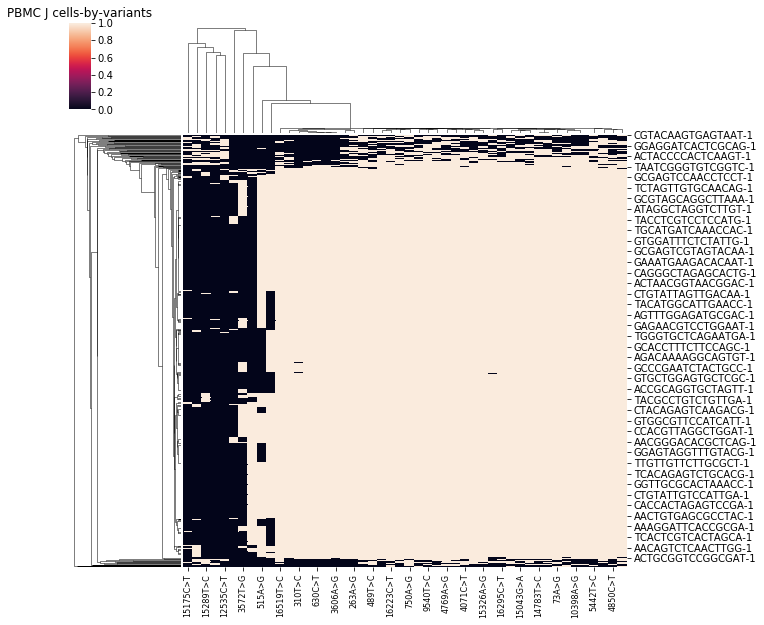

In [11]:
%matplotlib inline
bin_pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.copy()
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell>0] = 1
#bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_pbmc_j_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC J cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Overlap of called variants')

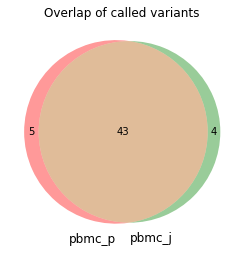

In [12]:

bin_pbmc_j_AF_by_cell.columns = bin_pbmc_j_AF_by_cell.columns + "_pbmc_j"
bin_pbmc_p_AF_by_cell.columns = bin_pbmc_p_AF_by_cell.columns + "_pbmc_p"
all_cells = pd.concat((bin_pbmc_j_AF_by_cell,bin_pbmc_p_AF_by_cell) ,axis=1)
all_cells_var_overlap = pd.concat((bin_pbmc_j_AF_by_cell,bin_pbmc_p_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values


%matplotlib inline
venn2([set(bin_pbmc_j_AF_by_cell.index.values),set(bin_pbmc_p_AF_by_cell.index.values)],set_labels=["pbmc_p","pbmc_j"])
plt.title("Overlap of called variants")


In [13]:
bin_pbmc_j_AF_by_cell

,AAACGAAGTGTCCCAG-1_pbmc_j,AAACTGCGTAGCGTTT-1_pbmc_j,AAAGATGAGTCCGGAA-1_pbmc_j,AAAGATGCAGGGCTTC-1_pbmc_j,AAAGATGCATGTGGGA-1_pbmc_j,AAAGGATAGCAGGAGG-1_pbmc_j,AAAGGATGTGAATACA-1_pbmc_j,AAAGGATGTGCTTTGA-1_pbmc_j,AAAGGATTCACCGCGA-1_pbmc_j,AAAGGGCCATTGAACC-1_pbmc_j,...,TTGTTCACATTATGGC-1_pbmc_j,TTGTTGTCATAGCCGC-1_pbmc_j,TTGTTGTGTGAGTTGG-1_pbmc_j,TTGTTGTTCTTGCGCT-1_pbmc_j,TTTACGTGTCACAGGA-1_pbmc_j,TTTACGTGTCCGCTTT-1_pbmc_j,TTTGAGGGTTTGTAGC-1_pbmc_j,TTTGCGCCAACTCGAT-1_pbmc_j,TTTGGCCCACCGAAAG-1_pbmc_j,TTTGTGTGTGCGTCCA-1_pbmc_j
3106C>A,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
3882G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8865G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
11719G>A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
15043G>A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
15301G>A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
146T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
199T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
310T>C,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
489T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0


In [14]:
cell_inds = {}
for ind, val in enumerate([bin_pbmc_j_AF_by_cell.columns.values,bin_pbmc_p_AF_by_cell.columns.values]):
    for j in val:
        cell_inds[j] = ind
pd.Series(cell_inds)

AAACGAAGTGTCCCAG-1_pbmc_j    0
AAACTGCGTAGCGTTT-1_pbmc_j    0
AAAGATGAGTCCGGAA-1_pbmc_j    0
AAAGATGCAGGGCTTC-1_pbmc_j    0
AAAGATGCATGTGGGA-1_pbmc_j    0
                            ..
TTGCTTATCCTAAGTG-1_pbmc_p    1
TTTACGTCAGGATGTG-1_pbmc_p    1
TTTACGTCAGTTCGGC-1_pbmc_p    1
TTTGCGCCAACTCGAT-1_pbmc_p    1
TTTGGTTAGTAGGAAG-1_pbmc_p    1
Length: 1065, dtype: int64

In [15]:
colors = {0:"J", 1:"P"}
cell_colors = pd.Series(cell_inds).map(colors)

cmap None


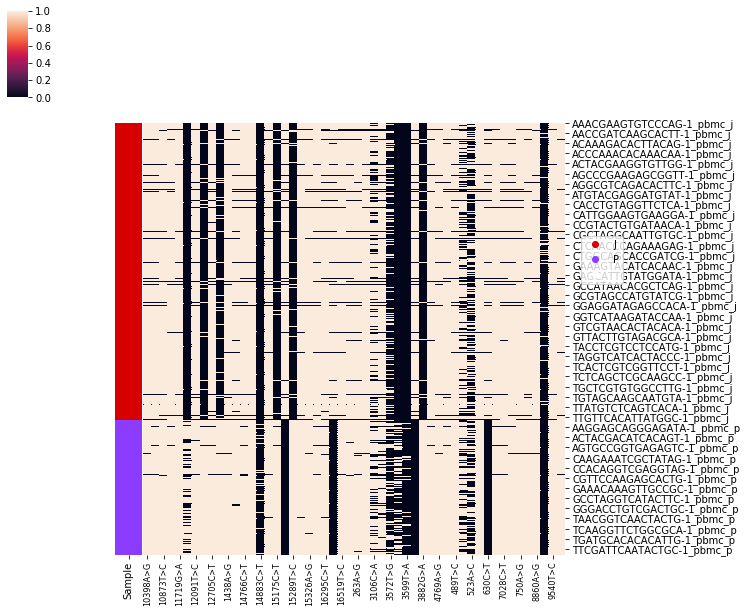

In [16]:
cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

cmap None


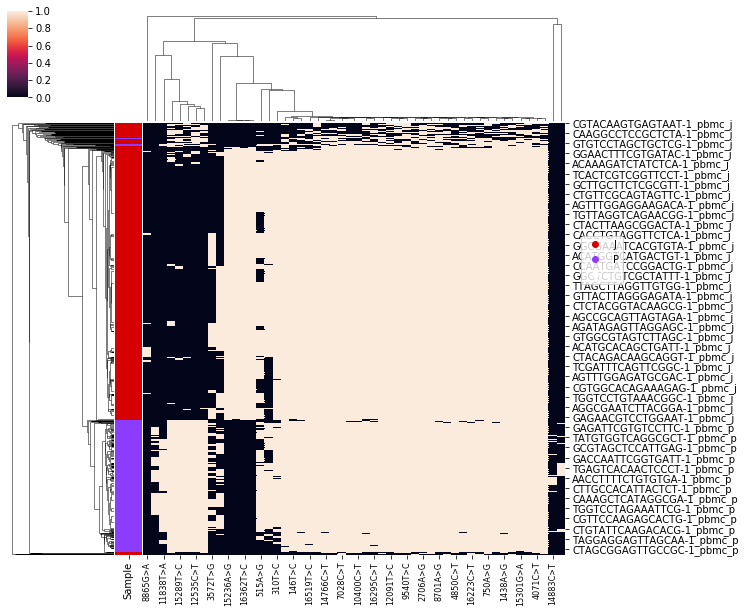

In [17]:
cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

## Relate this to coverage

In [18]:
pbmc_j_depth = pd.read_csv(join(concat_pbmc_j_dir,"sc_coverage.csv"), index_col=0)
pbmc_j_depth.columns = np.arange(1, pbmc_j_depth.shape[1]+1)
pbmc_p_depth = pd.read_csv(join(concat_pbmc_p_dir,"sc_coverage.csv"), index_col=0)
pbmc_p_depth.columns = np.arange(1, pbmc_p_depth.shape[1]+1)
pbmc_j_depth.index = pbmc_j_depth.index + "_pbmc_j"
pbmc_p_depth.index = pbmc_p_depth.index + "_pbmc_p"

cmap None


Text(0.5, 1, 'PBMC J cells-by-Position Depth')

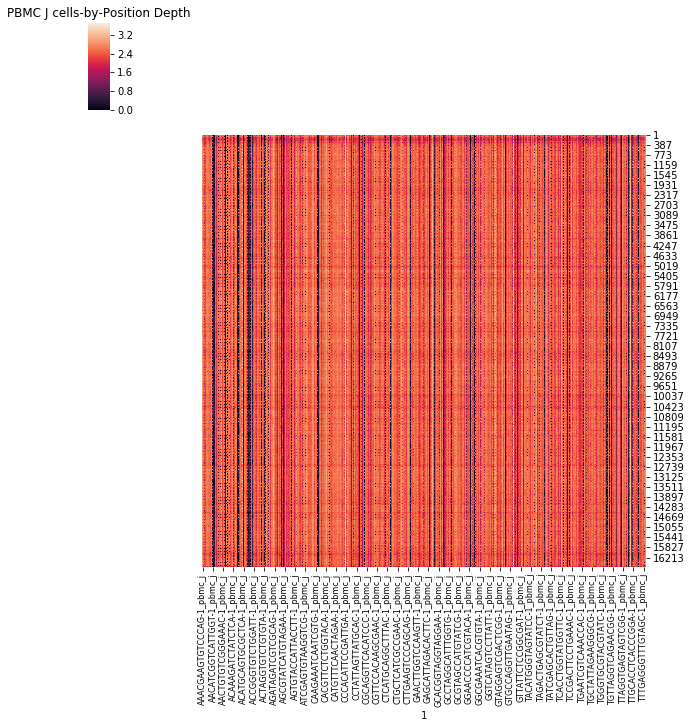

In [19]:
%matplotlib inline
cluster_help.plot_cluster(df=np.log10(pbmc_j_depth.transpose()+1), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC J cells-by-Position Depth")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

## AF-Depth in same positions

In [20]:
variant_positions = list(map(lambda x: int(x[:-3]), all_cells.index))

In [21]:
pbmc_j_depth.loc[:, variant_positions]

,10398,10400,10873,11665,11719,11838,12091,12535,12705,13434,...,630,6455,7028,73,750,8701,8860,8865,9540,9824
1,,,,,,,,,,,,,,,,,,,,,
AAACGAAGTGTCCCAG-1_pbmc_j,589.0,589.0,549.0,1072.0,739.0,995.0,837.0,802.0,493.0,749.0,...,1043.0,851.0,792.0,769.0,761.0,766.0,695.0,827.0,855.0,815.0
AAACTGCGTAGCGTTT-1_pbmc_j,411.0,400.0,304.0,418.0,401.0,612.0,399.0,626.0,307.0,516.0,...,535.0,524.0,421.0,271.0,443.0,453.0,509.0,594.0,451.0,361.0
AAAGATGAGTCCGGAA-1_pbmc_j,233.0,223.0,215.0,276.0,336.0,424.0,248.0,385.0,240.0,337.0,...,425.0,461.0,424.0,263.0,614.0,540.0,460.0,508.0,319.0,381.0
AAAGATGCAGGGCTTC-1_pbmc_j,241.0,238.0,312.0,349.0,317.0,438.0,320.0,461.0,339.0,463.0,...,465.0,384.0,326.0,300.0,462.0,454.0,334.0,407.0,484.0,401.0
AAAGATGCATGTGGGA-1_pbmc_j,88.0,88.0,37.0,74.0,66.0,105.0,46.0,53.0,38.0,72.0,...,63.0,68.0,28.0,26.0,50.0,49.0,47.0,53.0,39.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACGTGTCCGCTTT-1_pbmc_j,407.0,385.0,443.0,506.0,482.0,638.0,474.0,557.0,244.0,561.0,...,480.0,504.0,588.0,485.0,710.0,577.0,595.0,660.0,652.0,486.0
TTTGAGGGTTTGTAGC-1_pbmc_j,248.0,238.0,241.0,188.0,394.0,297.0,253.0,202.0,152.0,190.0,...,249.0,348.0,326.0,299.0,285.0,310.0,241.0,272.0,421.0,388.0
TTTGCGCCAACTCGAT-1_pbmc_j,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0


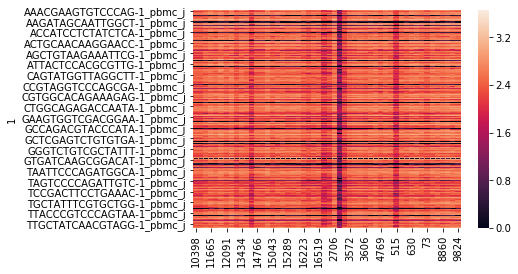

In [22]:
sns.heatmap(np.log10(pbmc_j_depth.loc[:, variant_positions]+1))

In [23]:

all_cells_depth = pd.concat((pbmc_j_depth.transpose(),pbmc_p_depth.transpose()) ,axis=1).transpose()
# cluster_help.plot_cluster(df=all_cells_depth, 
#                  fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
#                  to_row_clust=False, name=None, col_names=True,
#                  row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

In [24]:
all_cells_depth

,1,2,3,4,5,6,7,8,9,10,...,16560,16561,16562,16563,16564,16565,16566,16567,16568,16569
1,,,,,,,,,,,,,,,,,,,,,
AAACGAAGTGTCCCAG-1_pbmc_j,434.0,438.0,462.0,462.0,462.0,484.0,484.0,507.0,540.0,540.0,...,597.0,499.0,499.0,477.0,477.0,477.0,445.0,435.0,435.0,366.0
AAACTGCGTAGCGTTT-1_pbmc_j,148.0,148.0,148.0,149.0,149.0,149.0,149.0,149.0,179.0,179.0,...,212.0,180.0,180.0,180.0,180.0,180.0,180.0,144.0,144.0,100.0
AAAGATGAGTCCGGAA-1_pbmc_j,114.0,118.0,129.0,130.0,131.0,138.0,138.0,138.0,138.0,138.0,...,243.0,200.0,200.0,194.0,194.0,194.0,192.0,192.0,191.0,177.0
AAAGATGCAGGGCTTC-1_pbmc_j,150.0,150.0,150.0,150.0,150.0,163.0,163.0,176.0,181.0,181.0,...,286.0,274.0,253.0,253.0,253.0,252.0,246.0,246.0,245.0,214.0
AAAGATGCATGTGGGA-1_pbmc_j,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCTTATCCTAAGTG-1_pbmc_p,165.0,165.0,175.0,175.0,175.0,177.0,177.0,197.0,223.0,223.0,...,254.0,217.0,217.0,216.0,216.0,215.0,189.0,189.0,189.0,157.0
TTTACGTCAGGATGTG-1_pbmc_p,314.0,314.0,314.0,314.0,314.0,324.0,325.0,327.0,327.0,354.0,...,549.0,524.0,524.0,523.0,523.0,523.0,459.0,459.0,458.0,444.0
TTTACGTCAGTTCGGC-1_pbmc_p,107.0,112.0,118.0,118.0,118.0,126.0,126.0,135.0,143.0,150.0,...,190.0,178.0,178.0,178.0,178.0,178.0,170.0,169.0,169.0,161.0


cmap None


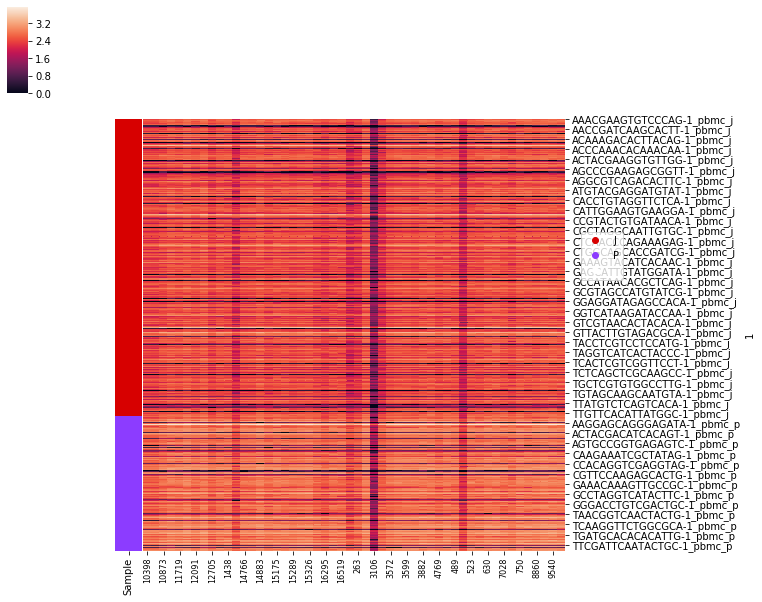

In [25]:
cluster_help.plot_cluster(df=np.log10(all_cells_depth.loc[:, variant_positions]+1), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

cmap None


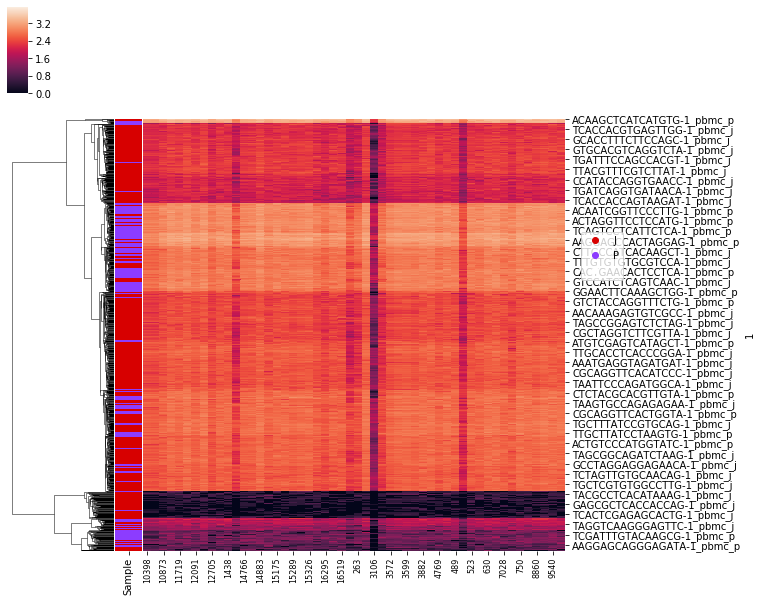

In [26]:
cluster_help.plot_cluster(df=np.log10(all_cells_depth.loc[:, variant_positions]+1), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

## Collect only the high AFs
80% of cells > 0.8 AF

In [153]:
all_cells_af = pd.concat((pbmc_j_AF_by_cell,pbmc_p_AF_by_cell) ,axis=1)
all_cells_af = all_cells_af.fillna(0)
overlap_variants = all_cells_var_overlap.columns.values

cell_thresh = 0.8*all_cells.shape[1]
high_af_cells = all_cells[(all_cells > 0.8).sum(axis=1)>cell_thresh]
variants_meta = pd.DataFrame(list(map(lambda x: [x[:-3], *(x[-3:].split(">"))], high_af_cells.index)), columns=["Position", "Reference", "Alternative"], index=high_af_cells.index)
high_af_cells

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AAACGAAGTGTCCCAG-1_pbmc_j,AAACTGCGTAGCGTTT-1_pbmc_j,AAAGATGAGTCCGGAA-1_pbmc_j,AAAGATGCAGGGCTTC-1_pbmc_j,AAAGATGCATGTGGGA-1_pbmc_j,AAAGGATAGCAGGAGG-1_pbmc_j,AAAGGATGTGAATACA-1_pbmc_j,AAAGGATGTGCTTTGA-1_pbmc_j,AAAGGATTCACCGCGA-1_pbmc_j,AAAGGGCCATTGAACC-1_pbmc_j,...,TTCTGTAAGGCACCTC-1_pbmc_p,TTGAGTGTCGCTACCT-1_pbmc_p,TTGCACCGTCAGGCTC-1_pbmc_p,TTGCCCAGTAAAGGCC-1_pbmc_p,TTGCCCATCGTTCAGA-1_pbmc_p,TTGCTTATCCTAAGTG-1_pbmc_p,TTTACGTCAGGATGTG-1_pbmc_p,TTTACGTCAGTTCGGC-1_pbmc_p,TTTGCGCCAACTCGAT-1_pbmc_p,TTTGGTTAGTAGGAAG-1_pbmc_p
10398A>G,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10400C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10873T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
11665C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11719G>A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12091T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
12705C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1438A>G,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
146T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
14766C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [151]:
variants_meta.head()

,Position,Reference,Alternative
10398A>G,10398,A,G
10400C>T,10400,C,T
10873T>C,10873,T,C
11665C>T,11665,C,T
11719G>A,11719,G,A


cmap None


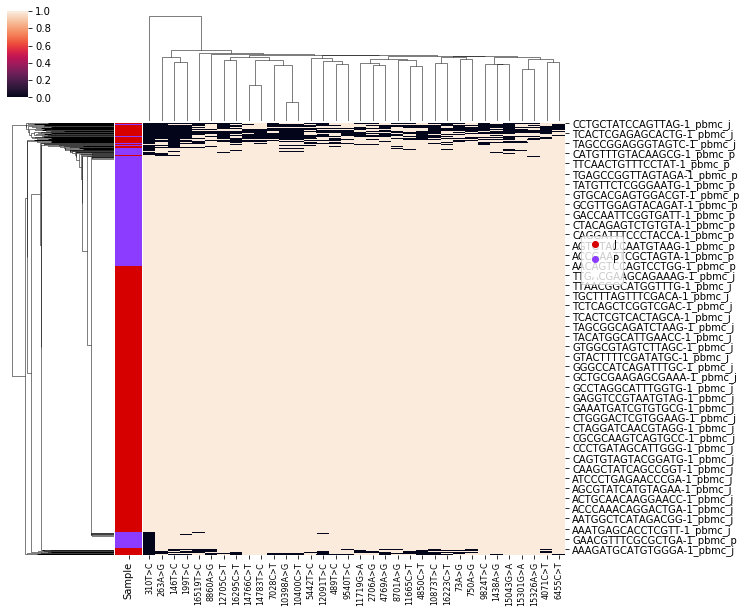

In [34]:
cluster_help.plot_cluster(df=high_af_cells.transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

In [164]:
# sparse_pbmc_p_df = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.A.strands.txt.gz"), header=None)
# sparse_pbmc_p_df["Nt"] = "A"
# curr = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.C.strands.txt.gz"), header=None)
# curr["Nt"] = "C"
# sparse_pbmc_p_df = pd.conccat((sparse_pbmc_p_df, curr), axis=0)

# curr = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.G.strands.txt.gz"), header=None)
# curr["Nt"] = "G"
# sparse_pbmc_p_df = pd.conccat((sparse_pbmc_p_df, curr), axis=0)
# curr = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.T.strands.txt.gz"), header=None)
# curr["Nt"] = "T"
# sparse_pbmc_p_df = pd.conccat((sparse_pbmc_p_df, curr), axis=0)
# sparse_pbmc_p_df 

sparse_pbmc_p = {}
sparse_pbmc_p['A'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.A.strands.txt.gz"), header=None)
sparse_pbmc_p['C'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.C.strands.txt.gz"), header=None)
sparse_pbmc_p['G'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.G.strands.txt.gz"), header=None)
sparse_pbmc_p['T'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.T.strands.txt.gz"), header=None)


sparse_pbmc_p["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]


sparse_pbmc_j = {}
sparse_pbmc_j['A'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.A.strands.txt.gz"), header=None)
sparse_pbmc_j['C'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.C.strands.txt.gz"), header=None)
sparse_pbmc_j['G'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.G.strands.txt.gz"), header=None)
sparse_pbmc_j['T'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.T.strands.txt.gz") ,header=None)

sparse_pbmc_j["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]



for nt in sparse_pbmc_j.keys():
    sparse_pbmc_j[nt]["Cell"] = sparse_pbmc_j[nt]["Cell"] + "_pbmc_j"

for nt in sparse_pbmc_p.keys():
    sparse_pbmc_p[nt]["Cell"] = sparse_pbmc_p[nt]["Cell"] + "_pbmc_p"

    

In [196]:
bq_pos = {}
pbmc_p_sparse_pos = {}
sparse_pos = {}
for ind, val in variants_meta.groupby("Alternative"):
    curr_bq = sparse_pbmc_p[ind][(sparse_pbmc_p[ind]["Position"].isin(val["Position"]))]
    sparse_pos[ind] = curr_bq
    pbmc_p_sparse_pos[ind] = curr_bq
    bq_pos[ind] = ((curr_bq["+ BQ"]) + (curr_bq["+ BQ"]))/2
    
pbmc_j_sparse_pos = {}
for ind, val in variants_meta.groupby("Alternative"):
    curr_bq = sparse_pbmc_j[ind][(sparse_pbmc_j[ind]["Position"].isin(val["Position"]))]
    pbmc_j_sparse_pos[ind] = curr_bq

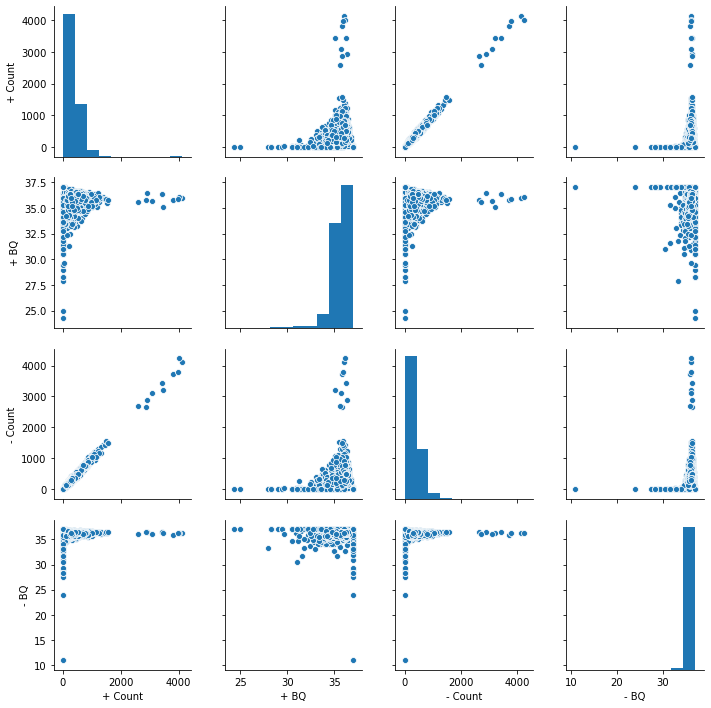

In [47]:
sns.pairplot(curr_bq,vars=["+ Count", "+ BQ", "- Count", "- BQ"])

In [52]:
bq_pos[ind][bq_pos[ind]<30].index

Int64Index([ 195608,  239493,  262256,  307741,  350522,  361026,  404611,
             631081, 1512227, 1513597],
           dtype='int64')

In [57]:
variants_meta["Position"] = variants_meta["Position"].astype(int)
curr_vars = sparse_pos[ind][sparse_pos[ind]["+ BQ"]< 30]
curr_vars = curr_vars[curr_vars["Position"].isin(variants_meta["Position"])]
curr_vars

,Position,Cell,+ Count,+ BQ,- Count,- BQ
195608,14766,ACTACGACATCACAGT-1,6,29.0,7,37.0
239493,16223,AGACAAAAGCAGAATT-1,5,29.4,5,37.0
262256,10400,AGCCTCTAGATTACGA-1,3,28.3,3,37.0
307741,16295,AGTGCCGGTGAGAGTC-1,5,29.4,5,37.0
350522,4071,ATGGATCCAATACTGC-1,7,27.9,7,33.3
361026,12705,ATGTCGAAGGCGATTG-1,3,24.3,3,37.0
404611,4850,CAACGGCCAGATTGTC-1,24,29.6,26,36.1
631081,16295,CGCTATCGTATTGTGC-1,3,28.3,5,37.0
1512227,10400,TTGCCCAGTAAAGGCC-1,3,28.3,2,37.0
1513597,16295,TTGCCCAGTAAAGGCC-1,1,25.0,1,37.0


In [64]:
curr_vars.shape

(10, 6)

## Merge the AF with quality

In [191]:
# def get_name(df,col='index'):
#     vals =  list(map(lambda x: (x[:-3], x[-3:].split(">")[0], x.split(">")[-1]), 
#                                         df[col]))
#     return pd.concat((df,pd.DataFrame(vals, columns=["Position","Referenece", "Alternative"])), axis=1)

# sparse_full = pd.DataFrame()


# for curr_ind in ["A", "C", "G", "T"]:
#     #curr_ind = "A"
#     curr_sparse = sparse_pos[curr_ind][sparse_pos[curr_ind]["Position"].isin(variants_meta["Position"])]#[sparse_pos[curr_ind]["Alternative"]==]

#     high_af_cells_sparse = high_af_cells.reset_index().melt(id_vars="index", var_name="Cell", value_name="AF")
#     high_af_cells_sparse  = get_name(high_af_cells_sparse)
#     high_af_cells_sparse

#     curr_sparse_af = pd.merge(curr_sparse, high_af_cells_sparse.astype({"Position":int}), on=["Position","Cell"],how="inner")
#     curr_sparse_af["log + Count"] = np.log2(curr_sparse_af["+ Count"])
#     curr_sparse_af["log - Count"] = np.log2(curr_sparse_af["- Count"])
#     curr_sparse_af
#     print(curr_sparse_af.shape)
#     sparse_full = pd.concat((sparse_full, curr_sparse_af), axis=0)
# sparse_full

(981, 12)
(3527, 12)
(3266, 12)
(3254, 12)


,Position,Cell,+ Count,+ BQ,- Count,- BQ,index,AF,Referenece,Alternative,log + Count,log - Count
0,11719,AAACGAAAGCTCGTTA-1_pbmc_p,243,36.7,289,36.2,11719G>A,1.0,G,A,7.924813,8.174926
1,15043,AAACGAAAGCTCGTTA-1_pbmc_p,319,36.1,308,36.4,15043G>A,1.0,G,A,8.317413,8.266787
2,15301,AAACGAAAGCTCGTTA-1_pbmc_p,231,35.9,219,36.0,15301G>A,1.0,G,A,7.851749,7.774787
3,11719,AAACGAAGTCCAGACC-1_pbmc_p,338,36.2,382,36.1,11719G>A,1.0,G,A,8.400879,8.577429
4,15043,AAACGAAGTCCAGACC-1_pbmc_p,263,36.2,230,36.2,15043G>A,1.0,G,A,8.038919,7.845490
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,11665,TTTGGTTAGTAGGAAG-1_pbmc_p,509,36.3,486,36.5,11665C>T,1.0,C,T,8.991522,8.924813
3250,12705,TTTGGTTAGTAGGAAG-1_pbmc_p,427,35.7,365,36.4,12705C>T,1.0,C,T,8.738092,8.511753
3251,14766,TTTGGTTAGTAGGAAG-1_pbmc_p,308,35.6,271,35.8,14766C>T,1.0,C,T,8.266787,8.082149
3252,16223,TTTGGTTAGTAGGAAG-1_pbmc_p,327,35.2,351,36.1,16223C>T,1.0,C,T,8.353147,8.455327


In [199]:
curr_sparse

,Position,Cell,+ Count,+ BQ,- Count,- BQ
1011,4071,AAACGAAAGCTCGTTA-1_pbmc_p,299,36.1,278,35.8
1227,4850,AAACGAAAGCTCGTTA-1_pbmc_p,340,36.0,341,36.2
1673,6455,AAACGAAAGCTCGTTA-1_pbmc_p,333,36.0,338,36.2
1849,7028,AAACGAAAGCTCGTTA-1_pbmc_p,419,36.5,505,36.4
2806,10400,AAACGAAAGCTCGTTA-1_pbmc_p,255,36.0,261,36.6
...,...,...,...,...,...,...
1540663,11665,TTTGGTTAGTAGGAAG-1_pbmc_p,509,36.3,486,36.5
1540995,12705,TTTGGTTAGTAGGAAG-1_pbmc_p,427,35.7,365,36.4
1541587,14766,TTTGGTTAGTAGGAAG-1_pbmc_p,308,35.6,271,35.8
1542025,16223,TTTGGTTAGTAGGAAG-1_pbmc_p,327,35.2,351,36.1


In [200]:
high_af_cells.head()


,AAACGAAGTGTCCCAG-1_pbmc_j,AAACTGCGTAGCGTTT-1_pbmc_j,AAAGATGAGTCCGGAA-1_pbmc_j,AAAGATGCAGGGCTTC-1_pbmc_j,AAAGATGCATGTGGGA-1_pbmc_j,AAAGGATAGCAGGAGG-1_pbmc_j,AAAGGATGTGAATACA-1_pbmc_j,AAAGGATGTGCTTTGA-1_pbmc_j,AAAGGATTCACCGCGA-1_pbmc_j,AAAGGGCCATTGAACC-1_pbmc_j,...,TTCTGTAAGGCACCTC-1_pbmc_p,TTGAGTGTCGCTACCT-1_pbmc_p,TTGCACCGTCAGGCTC-1_pbmc_p,TTGCCCAGTAAAGGCC-1_pbmc_p,TTGCCCATCGTTCAGA-1_pbmc_p,TTGCTTATCCTAAGTG-1_pbmc_p,TTTACGTCAGGATGTG-1_pbmc_p,TTTACGTCAGTTCGGC-1_pbmc_p,TTTGCGCCAACTCGAT-1_pbmc_p,TTTGGTTAGTAGGAAG-1_pbmc_p
10398A>G,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10400C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10873T>C,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
11665C>T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11719G>A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [201]:
sample[1]

{'A':          Position                       Cell  + Count  + BQ  - Count  - BQ
 4230        11719  AAACGAAGTGTCCCAG-1_pbmc_j      368  36.5      366  36.4
 5521        15043  AAACGAAGTGTCCCAG-1_pbmc_j      361  36.5      384  36.3
 5604        15301  AAACGAAGTGTCCCAG-1_pbmc_j      532  35.5      507  36.0
 9950        11719  AAACTGCGTAGCGTTT-1_pbmc_j      203  36.6      198  35.8
 11072       15043  AAACTGCGTAGCGTTT-1_pbmc_j      215  35.8      223  36.3
 ...           ...                        ...      ...   ...      ...   ...
 3838752     15043  TTTGGCCCACCGAAAG-1_pbmc_j      226  36.4      229  35.9
 3838830     15301  TTTGGCCCACCGAAAG-1_pbmc_j      250  36.1      209  36.3
 3843348     11719  TTTGTGTGTGCGTCCA-1_pbmc_j      249  36.4      261  36.4
 3844542     15043  TTTGTGTGTGCGTCCA-1_pbmc_j      256  36.5      262  35.5
 3844627     15301  TTTGTGTGTGCGTCCA-1_pbmc_j      329  35.6      309  36.5
 
 [2106 rows x 6 columns],
 'C':          Position                       Cell  + C

In [202]:
def get_name(df,col='index'):
    vals =  list(map(lambda x: (x[:-3], x[-3:].split(">")[0], x.split(">")[-1]), 
                                        df[col]))
    return pd.concat((df,pd.DataFrame(vals, columns=["Position","Referenece", "Alternative"])), axis=1)

sparse_full_both_samples = pd.DataFrame()

for sample in [('J', pbmc_j_sparse_pos), ('P', pbmc_p_sparse_pos)]:
    for curr_ind in ["A", "C", "G", "T"]:
        #curr_ind = "A"
        curr_sparse = sample[1][curr_ind][sample[1][curr_ind]["Position"].isin(variants_meta["Position"])]#[sample[curr_ind]["Alternative"]==]
        high_af_cells_sparse = high_af_cells.reset_index().melt(id_vars="index", var_name="Cell", value_name="AF")
        
        high_af_cells_sparse  = get_name(high_af_cells_sparse)
        high_af_cells_sparse
        
        high_af_cells_sparse["Sample"] = sample[0]
        curr_sparse_af = pd.merge(curr_sparse, high_af_cells_sparse.astype({"Position":int}), on=["Position","Cell"],how="inner")
        curr_sparse_af["log + Count"] = np.log2(curr_sparse_af["+ Count"])
        curr_sparse_af["log - Count"] = np.log2(curr_sparse_af["- Count"])
        curr_sparse_af
        print(curr_sparse_af.shape)
        sparse_full_both_samples = pd.concat((sparse_full_both_samples, curr_sparse_af), axis=0)
sparse_full_both_samples

(2106, 13)
(7646, 13)
(7022, 13)
(7008, 13)
(981, 13)
(3527, 13)
(3266, 13)
(3254, 13)


,Position,Cell,+ Count,+ BQ,- Count,- BQ,index,AF,Referenece,Alternative,Sample,log + Count,log - Count
0,11719,AAACGAAGTGTCCCAG-1_pbmc_j,368,36.5,366,36.4,11719G>A,1.0,G,A,J,8.523562,8.515700
1,15043,AAACGAAGTGTCCCAG-1_pbmc_j,361,36.5,384,36.3,15043G>A,1.0,G,A,J,8.495855,8.584963
2,15301,AAACGAAGTGTCCCAG-1_pbmc_j,532,35.5,507,36.0,15301G>A,1.0,G,A,J,9.055282,8.985842
3,11719,AAACTGCGTAGCGTTT-1_pbmc_j,203,36.6,198,35.8,11719G>A,1.0,G,A,J,7.665336,7.629357
4,15043,AAACTGCGTAGCGTTT-1_pbmc_j,215,35.8,223,36.3,15043G>A,1.0,G,A,J,7.748193,7.800900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,11665,TTTGGTTAGTAGGAAG-1_pbmc_p,509,36.3,486,36.5,11665C>T,1.0,C,T,P,8.991522,8.924813
3250,12705,TTTGGTTAGTAGGAAG-1_pbmc_p,427,35.7,365,36.4,12705C>T,1.0,C,T,P,8.738092,8.511753
3251,14766,TTTGGTTAGTAGGAAG-1_pbmc_p,308,35.6,271,35.8,14766C>T,1.0,C,T,P,8.266787,8.082149
3252,16223,TTTGGTTAGTAGGAAG-1_pbmc_p,327,35.2,351,36.1,16223C>T,1.0,C,T,P,8.353147,8.455327


In [203]:
sparse_full['Position'].unique()

array([11719, 15043, 15301,   146,   199,   310,   489,  5442,  9540,
        9824, 10873, 12091, 14783, 16519,    73,   263,   750,  1438,
        2706,  4769,  8701,  8860, 10398, 15326,  4071,  4850,  6455,
        7028, 10400, 11665, 12705, 14766, 16223, 16295])

## Both samples

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


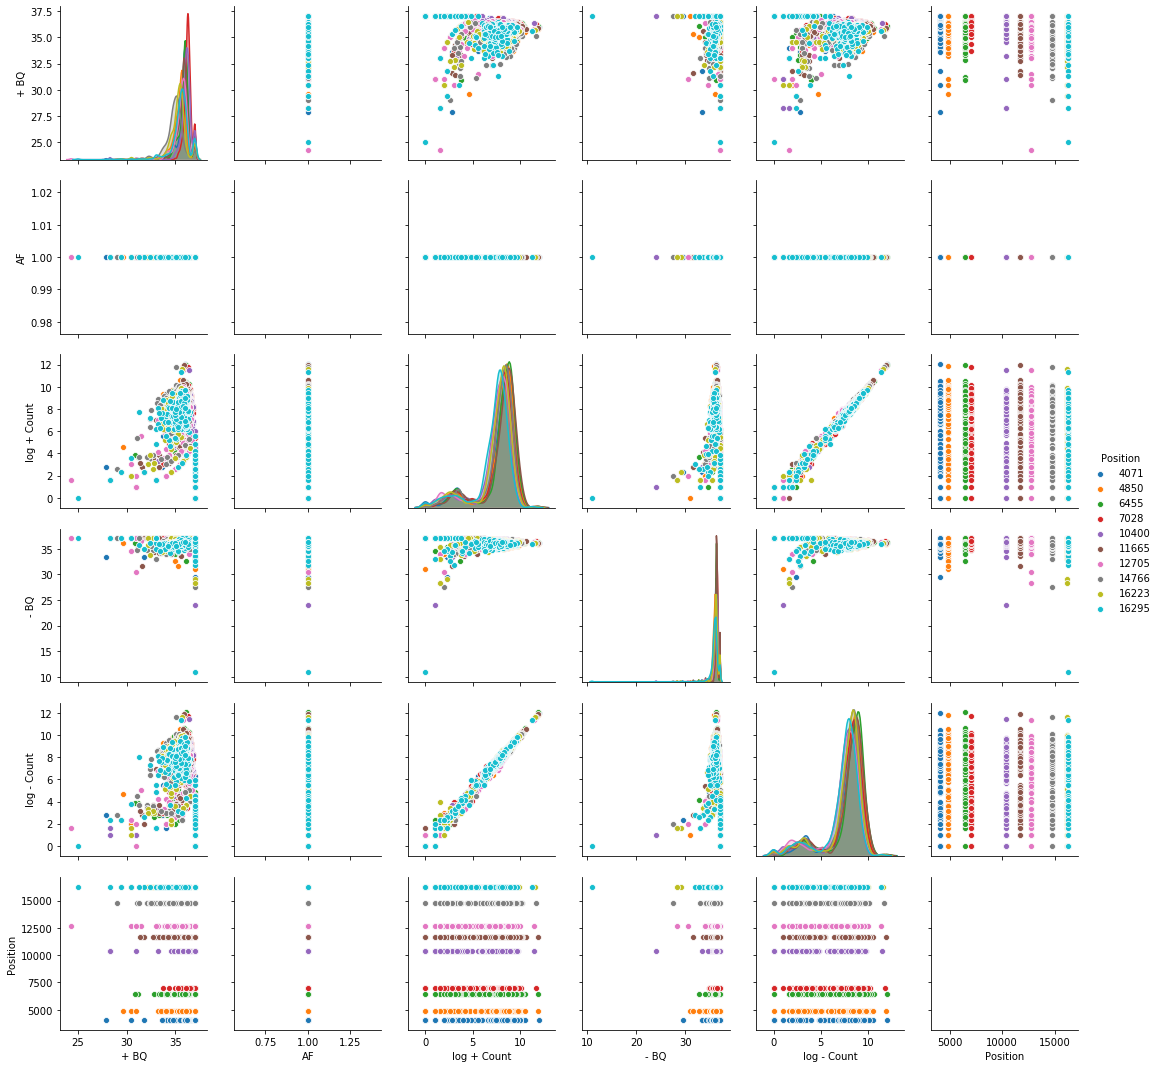

In [204]:
sns.pairplot(curr_sparse_af[["+ BQ", "AF", "log + Count", "- BQ","log - Count", "Position"]], hue="Position")